In [65]:
%matplotlib inline 
import numpy as np
import arrayfire as af

In [14]:
af.info()

## Creating Variables to test the activation functions

In [2]:
x_1D = np.arange(-4, 4,0.01, dtype=np.float32)

# Loading Scipy image function to load image into the a 3D array
from scipy import ndimage

x_3D = np.asarray(ndimage.imread('test.jpg'), dtype=np.float32)

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_3D)
plt.show()

# Linear Activation

In [6]:
def linear(x):
    return x


Testing Linear Activation

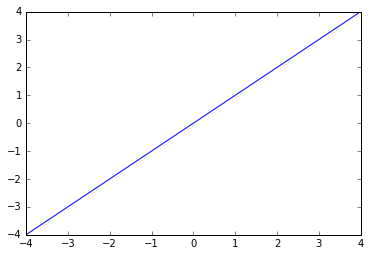

In [25]:
x = af.np_to_af_array(x_1D)
new_x = linear(x)
plt.plot(x,new_x)
plt.show()

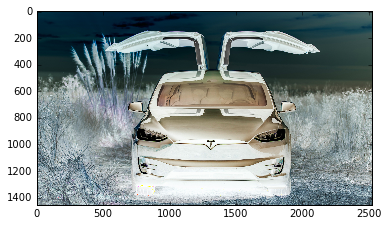

In [9]:
x = af.np_to_af_array(x_3D)
new_x = linear(x)
plt.imshow(new_x)
plt.show()

# Sigmoid Activation

In [10]:
def sigmoid(x):
    return af.arith.sigmoid(x)


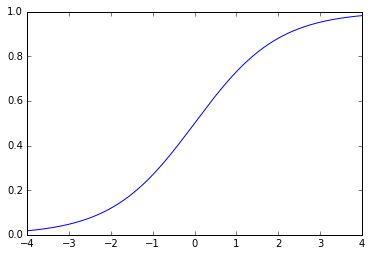

In [24]:
x = af.np_to_af_array(x_1D)
new_x = sigmoid(x)
plt.plot(x,new_x)
plt.show()

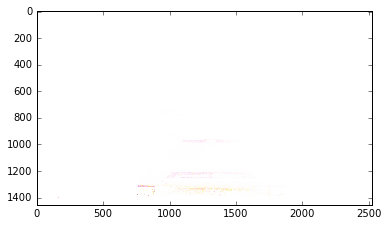

In [20]:
x = af.np_to_af_array(x_3D)
new_x = sigmoid(x)
plt.imshow(new_x)
plt.show()

# tanh Activation

In [21]:
def tanh(x):
    return af.arith.tanh(x)


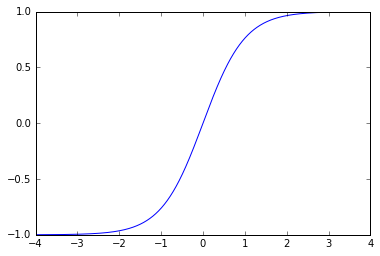

In [23]:
x = af.np_to_af_array(x_1D)
new_x = tanh(x)
plt.plot(x,new_x)
plt.show()

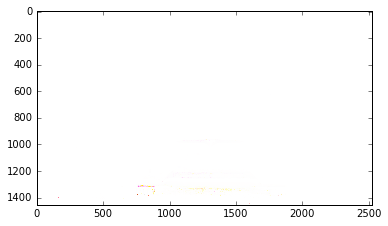

In [26]:
x = af.np_to_af_array(x_3D)
new_x = tanh(x)
plt.imshow(new_x)
plt.show()

# Relu

In [33]:
def relu(x):
    cond = af.Array(x > 0,dtype=af.Dtype.f32)
    return cond * x


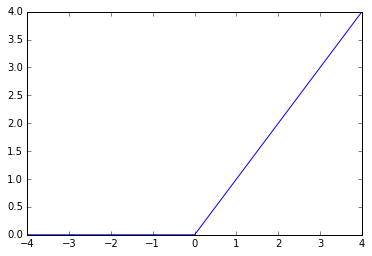

In [34]:
x = af.np_to_af_array(x_1D)
new_x = relu(x)
plt.plot(x,new_x)
plt.show()

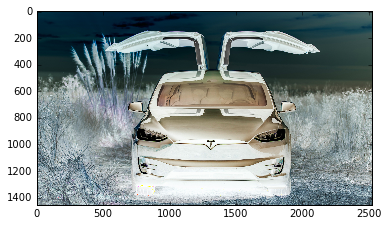

In [37]:
x = af.np_to_af_array(x_3D)
new_x = relu(x)
plt.imshow(new_x)
plt.show()

In [48]:
x_sum = af.algorithm.max(new_x,dim=0)
x_sum = af.algorithm.max(x_sum,dim=1)

In [55]:
def softmax(x):
    exp_ = af.arith.exp(x) # - af.algorithm.max(af.algorithm.max(x,dim = 0),dim = 1)
    sum_ = af.zeros(x.shape) * af.arith.sum(af.arith.sum(x, dim = 0), dim = 1)
    return exp_ / sum_


SyntaxError: invalid syntax (<ipython-input-55-68d2d3f7d0ec>, line 4)

In [54]:
x = af.np_to_af_array(x_1D)
new_x = softmax(x)
plt.plot(x,new_x)
plt.show()

RuntimeError: In function class af::dim4 __cdecl getOutDims(const class af::dim4 &,const class af::dim4 &,bool)
In file src\backend\ArrayInfo.cpp:173
Invalid dimension for argument 1
Expected: ldims == rdims


In [74]:
x = af.Array(range(1,90),(3, 10, 3))

RuntimeError: In function af_err __cdecl reduce_common<af_max_t>(void **,void *const ,const int)
In file src\api\c\reduce.cpp:78
Invalid argument at index 2
Expected: dim >= 0


In [97]:
import theano as t

t.tensor.sum(np.asarray(x), axis=-1, keepdims=True)

DimShuffle{0,1,x}.0

In [104]:
x1 = np.asarray(x) * np.asarray(x) 
x1 = t.tensor.ftensor3('x1')

TypeError: TensorType does not support iteration. Maybe you are using builtin.sum instead of theano.tensor.sum? (Maybe .max?)

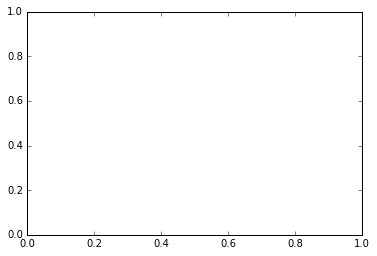

In [106]:
plt.plot(x1)
plt.show()